In [3]:
#import warnings to ignore filters
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load the iris dataset
iris = sns.load_dataset('iris')

In [5]:
# Explore the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Check for null values
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
# Check the distribution of target variable
print(iris['species'].value_counts())

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


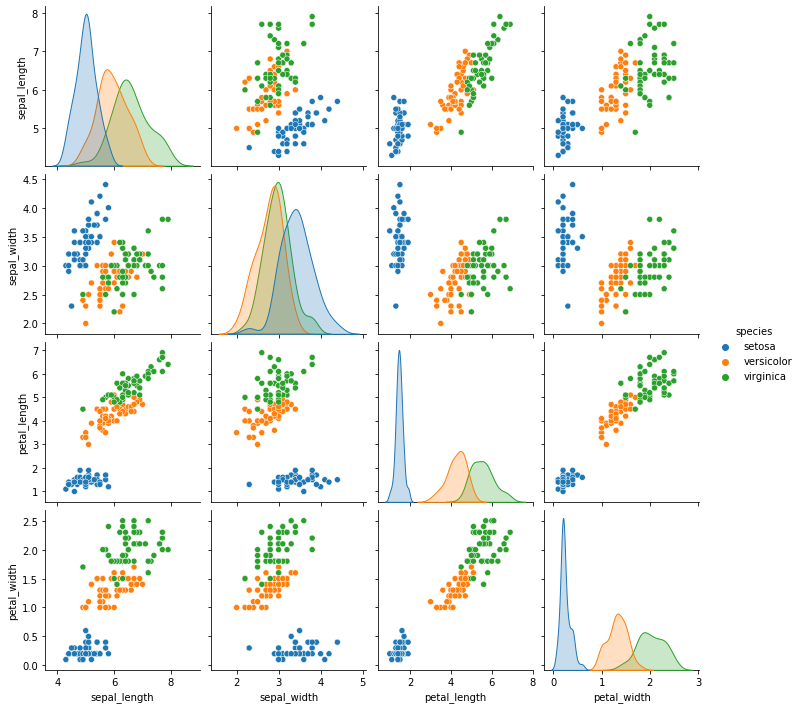

In [8]:
# Visualize the dataset
sns.pairplot(data=iris, hue='species')
plt.show()

In [9]:
# Split the dataset into train and test sets
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a pipeline for preprocessing and model building
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

In [11]:
# Define hyperparameters for tuning
param_grid = {
    'model': [DecisionTreeClassifier(), RandomForestClassifier()],
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__min_samples_split': [2, 4, 6, 8, 10],
    'model__min_samples_leaf': [1, 2, 3, 4, 5]
}

In [12]:
# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
         

In [13]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

Best hyperparameters:  {'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), 'model__max_depth': 4, 'model__min_samples_leaf': 2, 'model__min_samples_split': 6}


In [14]:
# Evaluate the model on the test set
y_pred = grid.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))

Accuracy:  1.0
Confusion matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
